In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('data.csv')
data.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data_input = data.drop('y', axis = 1)
data_output = data['y']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data_input, data_output, test_size = 0.2, random_state = 42)


In [5]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [6]:
class LinearRegression:
    def __init__(self, alpha = 0.01, n_iters = 1000):
        self.alpha   = alpha
        self.n_iters = n_iters
        self.weights = None
        self.bias    = None
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def fit(self, X, y):
        n_rows, n_features = X.shape
        self.weights          = np.zeros(n_features) 
        self.bias             = 0

        for _ in range(self.n_iters):
            Y_hat = self.predict(X)
            w = (1 / n_rows) * np.dot(X.T, (Y_hat - y))
            b = (1 / n_rows) * np.sum(Y_hat - y)

            self.weights -= self.alpha * w
            self.bias    -= self.alpha * b

In [7]:
LR = LinearRegression()

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

In [8]:
print(LR.bias)
print(LR.weights)

-3.826656363968963
[1.19481466]


In [9]:
mse = mean_squared_error(y_test, y_pred)
R2  = r2_score(y_test, y_pred)

print(f'mse = {mse}')
print(f'R2  = {R2}')

mse = 14.548118013816937
R2  = 0.5372789424383799


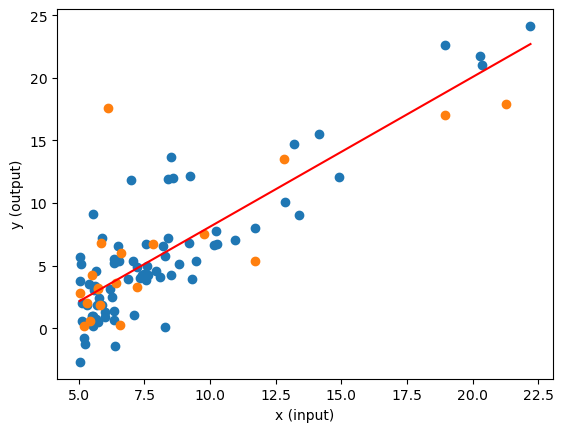

In [10]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

x_line = [min(X_train), max(X_train)]
y_line = [LR.predict(x) for x in x_line]

plt.plot(x_line, y_line, 'r-')

plt.xlabel('x (input)')
plt.ylabel('y (output)')
plt.show()